In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<h1>Reading the Data</h1>

In [2]:
# Reading data from folder 'data'
df = pd.read_csv('../data/Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<h1>Understanding the Data</h1>

In [3]:
# Data shape 
print("Row x Column: ", df.shape, end='\n \n')

Row x Column:  (167, 10)
 


In [4]:
# Data summary descriptive statistic
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Data column types and check NaN value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Check NaN value (2)
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [7]:
# Check if column Negara is unique and have proved that the data have been grouped by Negara
print(df.shape[0] == len(df.Negara.unique()))

True


<h1>Univariate Analysis</h1>

<Figure size 864x576 with 0 Axes>

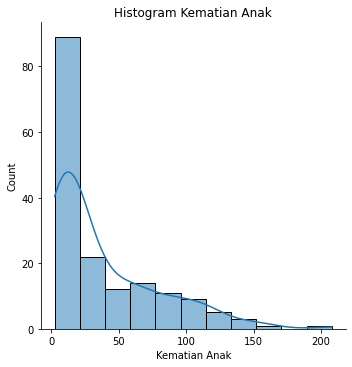

In [8]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Kematian_anak'], kde=True)

# Change title='Histogram Kematian Anak', xlabel='Kematian Anak' and ylabel='Count'
plt.title('Histogram Kematian Anak')
plt.xlabel('Kematian Anak')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data kematian anak **skew ke kanan** (modus < mean)
2. Persebaran data kematian anak **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 0-50**
3. Jumlah angka kematian anak **tertinggi** terdapat pada **rentang 0-50** sebanyak **lebih dari 80**
4. Jumlah angka kematian anak **terendah** terdapat pada **rentang 150-200** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

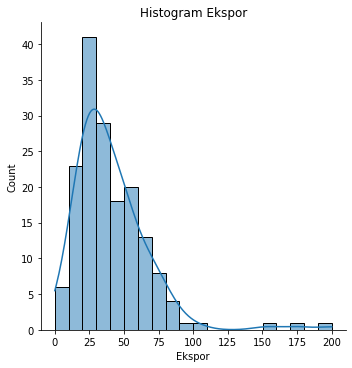

In [9]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Ekspor'], kde=True)

# Change title='Histogram Ekspor', xlabel='Ekspor' and ylabel='Count'
plt.title('Histogram Ekspor')
plt.xlabel('Ekspor')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data ekspor **skew ke kanan** (modus < mean)
2. Persebaran data ekspor **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 12-75**
3. Jumlah angka ekspor **tertinggi** terdapat pada **rentang 25** sebanyak **40**
4. Jumlah angka ekspor **terendah** terdapat pada **rentang 100-200** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

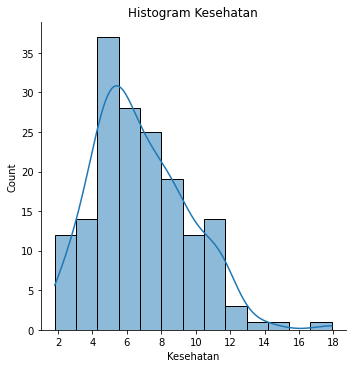

In [10]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Kesehatan'], kde=True)

# Change title='Histogram Kesehatan', xlabel='Kesehatan' and ylabel='Count'
plt.title('Histogram Kesehatan')
plt.xlabel('Kesehatan')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data kesehatan **skew ke kanan** (modus < mean)
2. Persebaran data kesehatan **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 5-9**
3. Jumlah angka kesehatan **tertinggi** terdapat pada **rentang 5** sebanyak **lebih dari 35**
4. Jumlah angka kesehatan **terendah** terdapat pada **rentang 13-18** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

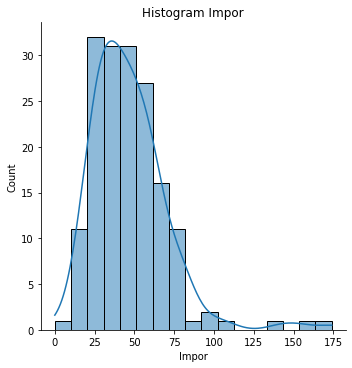

In [11]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Impor'], kde=True)

# Change title='Histogram Impor', xlabel='Impor' and ylabel='Count'
plt.title('Histogram Impor')
plt.xlabel('Impor')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data impor **skew ke kanan** (modus < mean)
2. Persebaran data impor **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 12-75**
3. Jumlah angka impor **tertinggi** terdapat pada **rentang 25 - 50** sebanyak **lebih dari 30**
4. Jumlah angka impor **terendah** terdapat pada **rentang 0-12 dan 80-175** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

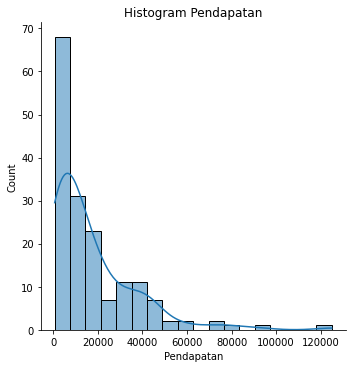

In [12]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Pendapatan'], kde=True)

# Change title='Histogram Pendapatan', xlabel='Pendapatan' and ylabel='Count'
plt.title('Histogram Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data pendapatan **skew ke kanan** (modus < mean)
2. Persebaran data pendapatan **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 0-20000**
3. Jumlah angka pendapatan **tertinggi** terdapat pada **rentang 0-10000** sebanyak **lebih dari 60**
4. Jumlah angka pendapatan **terendah** terdapat pada **rentang 50000-120000** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

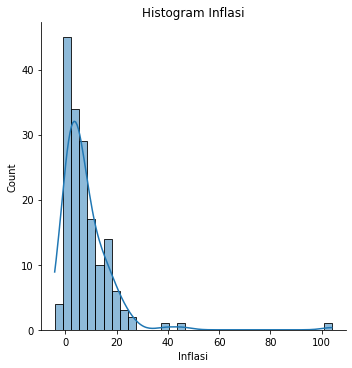

In [13]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Inflasi'], kde=True)

# Change title='Histogram Inflasi', xlabel='Inflasi' and ylabel='Count'
plt.title('Histogram Inflasi')
plt.xlabel('Inflasi')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data inflasi **skew ke kanan** (modus < mean)
2. Persebaran data inflasi **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 0-10**
3. Jumlah angka inflasi **tertinggi** terdapat pada **rentang 5** sebanyak **lebih dari 40**
4. Jumlah angka inflasi **terendah** terdapat pada **rentang 20-110** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

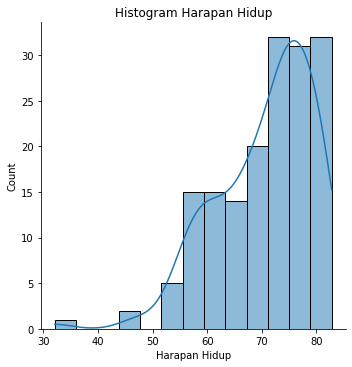

In [14]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Harapan_hidup'], kde=True)

# Change title='Histogram Harapan Hidup', xlabel='Harapan Hidup' and ylabel='Count'
plt.title('Histogram Harapan Hidup')
plt.xlabel('Harapan Hidup')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data harapan hidup **skew ke kiri** (modus > mean)
2. Persebaran data harapan hidup **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 70-85**
3. Jumlah angka harapan hidup **tertinggi** terdapat pada **rentang 70-85** sebanyak **lebih dari 30**
4. Jumlah angka harapan hidup **terendah** terdapat pada **rentang 30-50** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

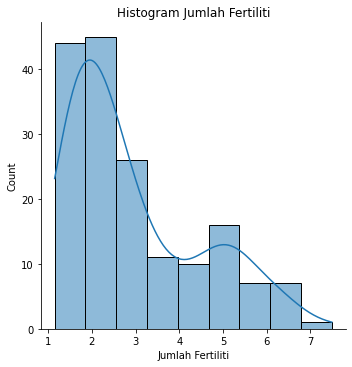

In [15]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Jumlah_fertiliti'], kde=True)

# Change title='Histogram Jumlah Fertiliti', xlabel='Jumlah Fertiliti' and ylabel='Count'
plt.title('Histogram Jumlah Fertiliti')
plt.xlabel('Jumlah Fertiliti')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data jumlah fertiliti **skew ke kanan** (modus < mean)
2. Persebaran data jumlah fertiliti **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 1-3**
3. Jumlah angka jumlah fertiliti **tertinggi** terdapat pada **rentang 1-3** sebanyak **lebih dari 40**
4. Jumlah angka jumlah fertiliti **terendah** terdapat pada **rentang 7** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

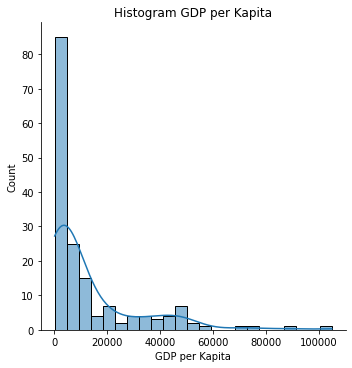

In [16]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['GDPperkapita'], kde=True)

# Change title='Histogram GDP per Kapita', xlabel='GDP per Kapita' and ylabel='Count'
plt.title('Histogram GDP per Kapita')
plt.xlabel('GDP per Kapita')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data GDP per kapita **skew ke kanan** (modus < mean)
2. Persebaran data GDP per kapita **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 0-5000**
3. Jumlah angka GDP per kapita **tertinggi** terdapat pada **rentang 0-5000** sebanyak **lebih dari 80**
4. Jumlah angka GDP per kapita **terendah** terdapat pada **rentang 60000-120000** sebanyak **mendekati 0**

<h1>Multivariate Analysis</h1>

<AxesSubplot:>

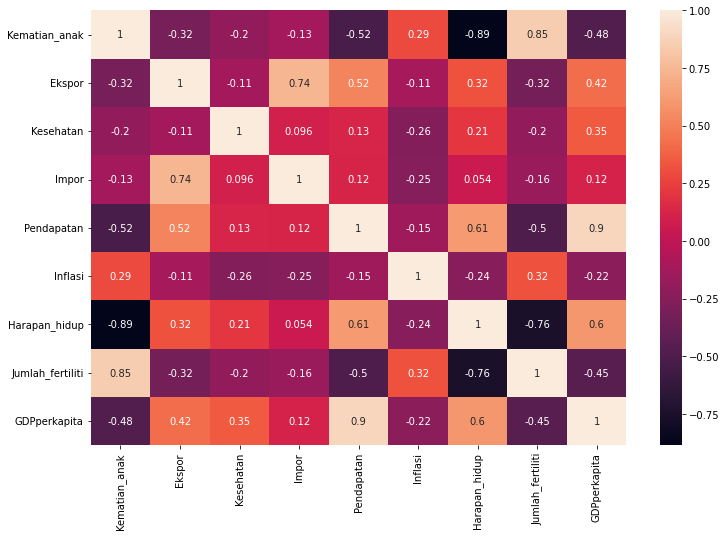

In [17]:
# plotting dataframe
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot =True, fmt='.2g')

Analysis: 

Cukup kuat: Correlation coefficient >=0.5 or <= -0.5

## Correlation Table

Kolom            | Kolom korelasi yang cukup kuat                                                                                   | Jumlah kolom korelasi
-----------------|------------------------------------------------------------------------------------------------------------------| ---------------------
Kematian_anak    | Harapan_hidup(**berbanding terbalik**), Jumlah_fertiliti                                                         | 2
Ekspor           | Impor, Pendapatan                                                                                                | 2
Kesehatan        | Korelasinya yang cukup lemah dengan kolom lain                                                                   | 0
Impor            | Ekspor                                                                                                           | 1
Pendapatan       | Kematian_anak, Ekspor, Harapan_hidup, Jumlah_fertiliti, GDPperkapita                                             | 5
Inflasi          | Korelasinya yang cukup lemah dengan kolom lain                                                                   | 0
Harapan_hidup    | Kematian_anak(**berbanding terbalik**), Pendapatan, Jumlah_fertiliti(**berbanding terbalik**), GDPperkapita      | 4
Jumlah_fertiliti | Kematian_anak, Pendapatan, Harapan_hidup                                                                         | 3
GDPperkapita     | Pendapatan, Harapan_hidup                                                                                        | 2

In [18]:
# Create function Quantile based flooring and capping

# Procedure to replace outliers with upper or lower bound
# Param     : x dataframe attribute type
# Return    : filtered dataframe without outliers
def replace_outliers(x):
    # Calculate q1, q3 and interquartile
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1

    # Calculate the lower and upper bound of data
    lower_ = q1 - (iqr * 1.5)
    upper_ = q3 + (iqr * 1.5)

    # Replace outliers with upper or lower bound
    x = np.where(x > upper_, upper_, np.where(x < lower_, lower_, x))

    return x

In [19]:
# Dataframe each focused analysis
dfdeath = df[['Negara', 'Kematian_anak', "Harapan_hidup", "Jumlah_fertiliti"]].copy()
dfekspor = df[['Negara','Ekspor', 'Impor', "Pendapatan"]].copy()
dfgdp = df[['Negara', 'GDPperkapita', "Pendapatan", "Harapan_hidup"]].copy()

<h1>Cluster for Column Kematian_anak</h1>

<h2>Handling Outliers</h2>

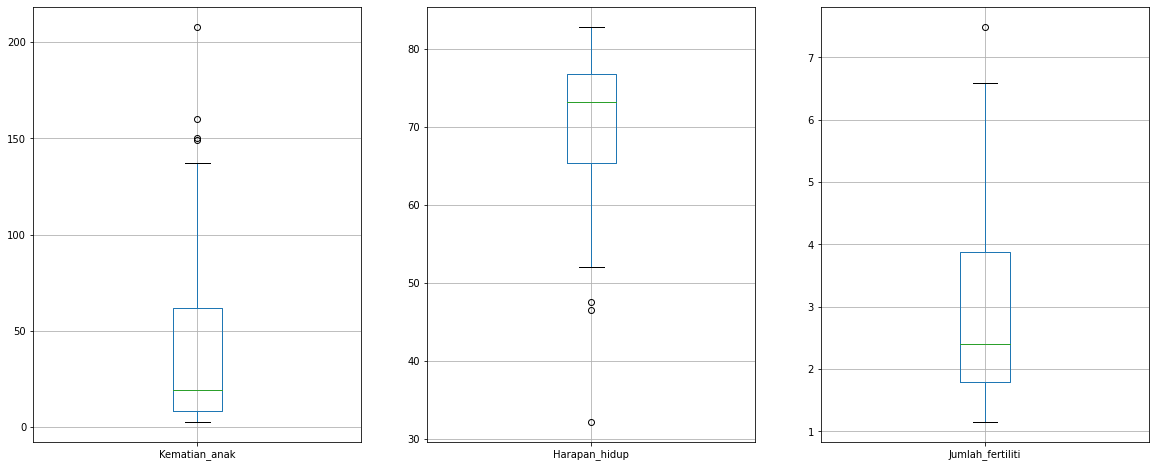

In [20]:
# Data visualization before handling outliers

# Create canvas with 1-D array axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

# Visualize the data
# initializing the axes index
i = 0
for col in dfdeath.columns:
    if(col != 'Negara'):
        dfdeath.boxplot(column=col, ax=axes[i])
        i += 1

In [21]:
# Replace outliers with upper and lower value from dataframe

for col in dfdeath.columns:
    if(col != 'Negara'):
        dfdeath[col] = replace_outliers(dfdeath[col])

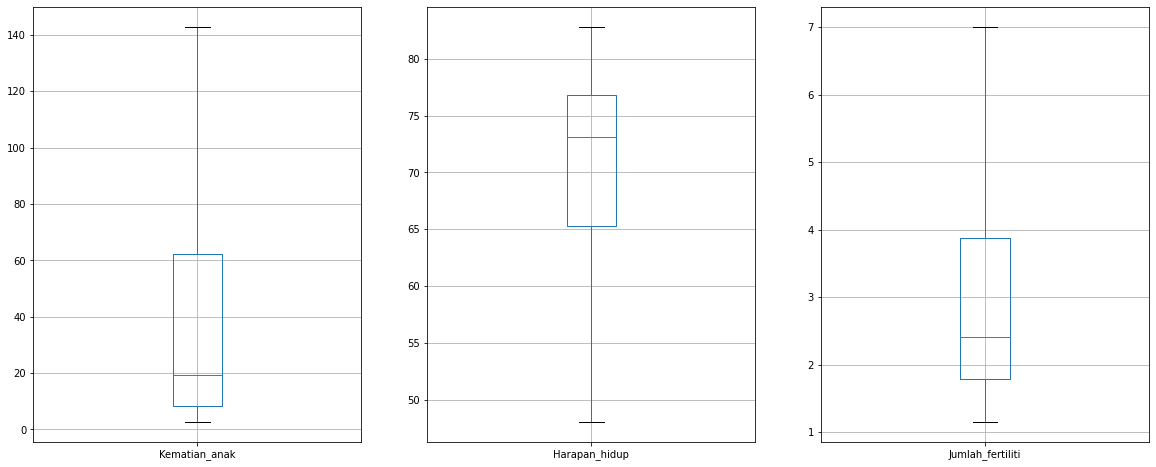

In [22]:
# Data visualization after handling outliers

# Create canvas with 1-D array axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

# Visualize the data
# initializing the axes index
i = 0
for col in dfdeath.columns:
    if(col != 'Negara'):
        dfdeath.boxplot(column=col, ax=axes[i])
        i += 1

In [23]:
dfselect_1 = dfdeath[['Kematian_anak', 'Harapan_hidup', 'Jumlah_fertiliti']].copy()

<h2>Scaling Data</h2>

In [24]:
# Fit data scaling on dataframe
dfselect_1 = StandardScaler().fit_transform(dfselect_1.astype(float))

<h2>Elbow Method</h2>

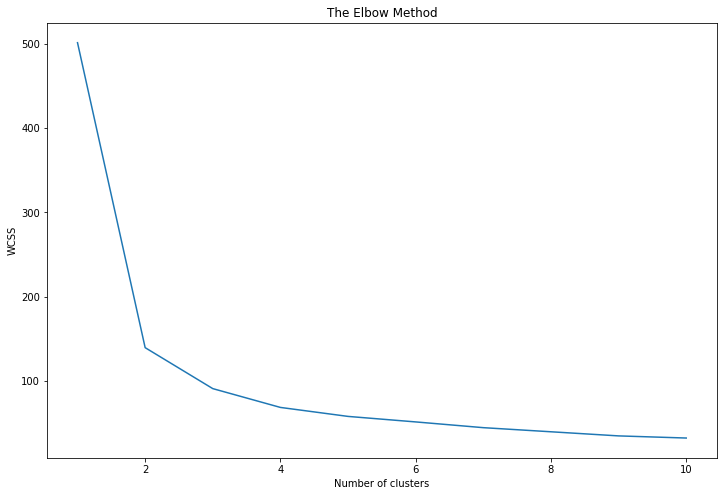

In [25]:
# Create array for WCSS value
wcss = [] 

# Create i KMeans from scaled dataframe
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dfselect_1)

    # kmeans.inertia sum of squared distances to the closest 'centroid' 
    # for all 'observation data' in the training set
    wcss.append(kmeans.inertia_)

# Create canvas
plt.figure(figsize=(12, 8))

# Plotting the array of wcss
plt.plot(range(1, 11), wcss)

# Give the title, x label, and y label in the canvas
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

Analysis: From The Elbow Method above, the recommended cluster number is 3 (X-axis value at the elbow line).

<h2>3-Means Clustering</h2>

In [26]:
# Learning the data with KMeans cluster k = 3
kmeans_kid_3 = KMeans(n_clusters=3, random_state=42).fit(dfselect_1)

# Get the labels from kmeans
labels_kid = kmeans_kid_3.labels_

# Create new dataframe with dataframe that have been scaled and rename the column
dfclust3 = pd.DataFrame(data=dfselect_1, columns=['Kematian_anak', 'Harapan_hidup', 'Jumlah_fertiliti'])

# Add new column 'labels_kid_3' as the label of the cluster
dfclust3['labels_kid_3'] = kmeans_kid_3.labels_
dfclust3

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti,labels_kid_3
0,1.369802,-1.702225,1.915276,2
1,-0.550464,0.663321,-0.862779,1
2,-0.271295,0.686859,-0.036691,1
3,2.121210,-1.243238,2.141784,2
4,-0.714835,0.722166,-0.543003,1
...,...,...,...,...
162,-0.221723,-0.901941,0.369691,0
163,-0.537419,0.557401,-0.316495,1
164,-0.375657,0.286717,-0.662919,1
165,0.485332,-0.372341,1.149146,0


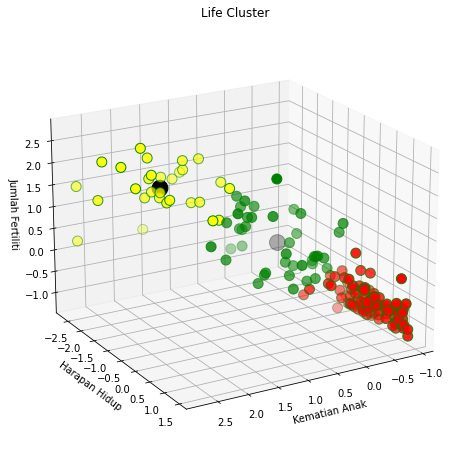

In [27]:
# Create canvas
fig = plt.figure(figsize=(12, 8))

# Create 3D plotting
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfclust3['Kematian_anak'][dfclust3.labels_kid_3==0], dfclust3['Harapan_hidup'][dfclust3.labels_kid_3==0], dfclust3['Jumlah_fertiliti'][dfclust3.labels_kid_3==0], c='green', s=100, edgecolors='green')
ax.scatter(dfclust3['Kematian_anak'][dfclust3.labels_kid_3==1], dfclust3['Harapan_hidup'][dfclust3.labels_kid_3==1], dfclust3['Jumlah_fertiliti'][dfclust3.labels_kid_3==1], c='red', s=100, edgecolors='green')
ax.scatter(dfclust3['Kematian_anak'][dfclust3.labels_kid_3==2], dfclust3['Harapan_hidup'][dfclust3.labels_kid_3==2], dfclust3['Jumlah_fertiliti'][dfclust3.labels_kid_3==2], c='yellow', s=100, edgecolors='green')


scatter = ax.scatter(kmeans_kid_3.cluster_centers_[:, 0], kmeans_kid_3.cluster_centers_[:, 1], kmeans_kid_3.cluster_centers_[:, 2], s = 250, marker='o', c='k', label='centroids')
plt.title('Life Cluster')
plt.xlabel('Kematian Anak')
plt.ylabel('Harapan Hidup')
ax.set_zlabel('Jumlah Fertiliti')

# rotate the axes and update
ax.view_init(20, 60)

plt.show()

Analysis: 
- Pada cluster 1 (**hijau**), data memiliki data rentang yang **normal** (median dari setiap kategori) dari kategori kematian anak, harapan hidup, dan jumlah fertiliti.
- Pada cluster 2 (**red**), data memiliki angka **kematian anak** yang **rendah**, **harapan hidup** yang **tinggi**, dan **jumlah fertiliti** yang **rendah**.
- Pada cluster 3 (**yellow**), data memiliki angka **kematian anak** yang **tinggi**, **harapan hidup** yang **rendah**, dan **jumlah fertiliti** yang **tinggi**.

<h1>Cluster for Column Ekspor</h1>

<h2>Handling Outliers</h2>

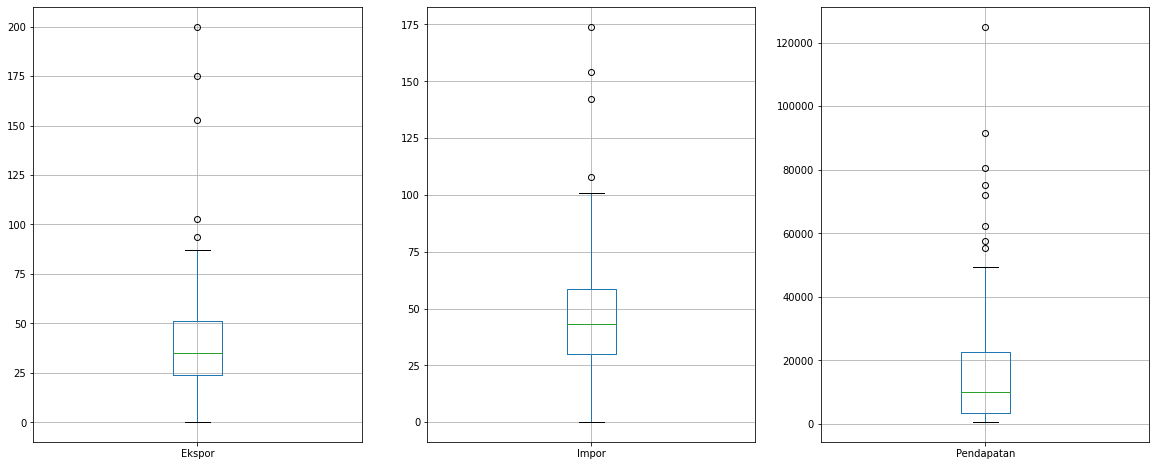

In [28]:
# Data visualization before handling outliers

# Create canvas with 1-D array axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

# Visualize the data
# initializing the axes index
i = 0
for col in dfekspor.columns:
    if(col != 'Negara'):
        dfekspor.boxplot(column=col, ax=axes[i])
        i += 1

In [29]:
# Replace outliers with upper and lower value from dataframe

for col in dfekspor.columns:
    if(col != 'Negara'):
        dfekspor[col] = replace_outliers(dfekspor[col])

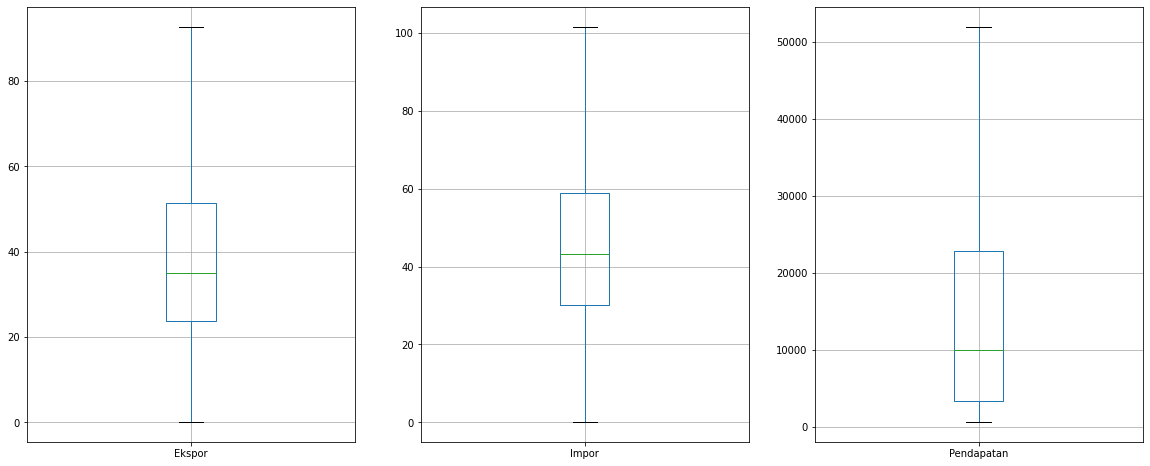

In [30]:
# Data visualization after handling outliers

# Create canvas with 1-D array axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

# Visualize the data
# initializing the axes index
i = 0
for col in dfekspor.columns:
    if(col != 'Negara'):
        dfekspor.boxplot(column=col, ax=axes[i])
        i += 1

In [31]:
dfselect_2 = dfekspor[['Ekspor', 'Impor', 'Pendapatan']].copy()

<h2>Scaling Data</h2>

In [32]:
# Fit data scaling on dataframe
dfselect_2 = StandardScaler().fit_transform(dfselect_2.astype(float))

<h2>Elbow Method</h2>

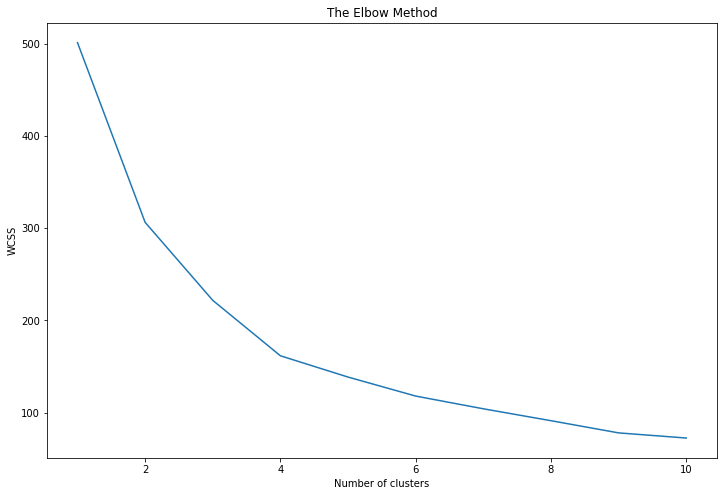

In [33]:
# Create array for WCSS value
wcss = [] 

# Create i KMeans from scaled dataframe
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dfselect_2)

    # kmeans.inertia sum of squared distances to the closest 'centroid' 
    # for all 'observation data' in the training set
    wcss.append(kmeans.inertia_)

# Create canvas
plt.figure(figsize=(12, 8))

# Plotting the array of wcss
plt.plot(range(1, 11), wcss)

# Give the title, x label, and y label in the canvas
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

Analysis: **Tidak dapat ditemukan** nilai optimal K untuk KMeans dan saya **menduga** kemungkinan ini karena data **kolom Pendapatan** yang **sangat besar** sehingga **mempengaruhi skala** setiap jarak pada saat dilakukan **scaling**.

<h2>2-Means Clustering</h2>

In [34]:
# Learning the data with KMeans cluster k = 2
kmeans_ekspor_2 = KMeans(n_clusters=2, random_state=42).fit(dfselect_2)

# Get the labels from kmeans
labels_ekspor_2 = kmeans_ekspor_2.labels_

# Create new dataframe with dataframe that have been scaled and rename the column
dfclust2_ekspor = pd.DataFrame(data=dfselect_2, columns=['Ekspor', 'Impor', 'Pendapatan'])

# Add new column 'label_2' as the label of the cluster
dfclust2_ekspor['labels_ekspor_2'] = kmeans_ekspor_2.labels_
dfclust2_ekspor

,Ekspor,Impor,Pendapatan,labels_ekspor_2
0,-1.391107,-0.047444,-0.943936,1
1,-0.543547,0.135021,-0.395181,1
2,-0.053846,-0.713196,-0.199291,1
3,1.071524,-0.146074,-0.660984,0
4,0.280469,0.642965,0.209637,0
...,...,...,...,...
162,0.332264,0.337212,-0.855555,1
163,-0.520004,-1.393742,0.038151,1
164,1.528265,1.693373,-0.753982,0
165,-0.449374,-0.565251,-0.754642,1


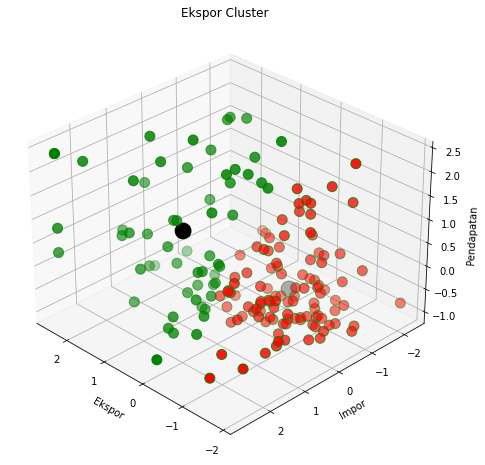

In [35]:
# Create canvas
fig = plt.figure(figsize=(12, 8))

# Create 3D plotting
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfclust2_ekspor['Ekspor'][dfclust2_ekspor.labels_ekspor_2==0], dfclust2_ekspor['Impor'][dfclust2_ekspor.labels_ekspor_2==0], dfclust2_ekspor['Pendapatan'][dfclust2_ekspor.labels_ekspor_2==0], c='green', s=100, edgecolors='green')
ax.scatter(dfclust2_ekspor['Ekspor'][dfclust2_ekspor.labels_ekspor_2==1], dfclust2_ekspor['Impor'][dfclust2_ekspor.labels_ekspor_2==1], dfclust2_ekspor['Pendapatan'][dfclust2_ekspor.labels_ekspor_2==1], c='red', s=100, edgecolors='green')

scatter = ax.scatter(kmeans_ekspor_2.cluster_centers_[:, 0], kmeans_ekspor_2.cluster_centers_[:, 1], kmeans_ekspor_2.cluster_centers_[:, 2], s = 250, marker='o', c='k', label='centroids')
plt.title('Ekspor Cluster')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
ax.set_zlabel('Pendapatan')

# rotate the axes and update
ax.view_init(30, 135)

plt.show()

Analysis: **Persebaran** data terlalu **general** sehingga **tidak dapat** diambil **kesimpulan** dari data.

<h2>3-Means Clustering</h2>

In [36]:
# Learning the data with KMeans cluster k = 3
kmeans_ekspor_3 = KMeans(n_clusters=3, random_state=42).fit(dfselect_2)

# Get the labels from kmeans
labels_ekspor_3 = kmeans_ekspor_3.labels_

# Create new dataframe with dataframe that have been scaled and rename the column
dfclust3_ekspor = pd.DataFrame(data=dfselect_2, columns=['Ekspor', 'Impor', 'Pendapatan'])

# Add new column 'labels_ekspor_3' as the label of the cluster
dfclust3_ekspor['labels_ekspor_3'] = kmeans_ekspor_3.labels_
dfclust3_ekspor

,Ekspor,Impor,Pendapatan,labels_ekspor_3
0,-1.391107,-0.047444,-0.943936,1
1,-0.543547,0.135021,-0.395181,1
2,-0.053846,-0.713196,-0.199291,1
3,1.071524,-0.146074,-0.660984,0
4,0.280469,0.642965,0.209637,0
...,...,...,...,...
162,0.332264,0.337212,-0.855555,1
163,-0.520004,-1.393742,0.038151,1
164,1.528265,1.693373,-0.753982,0
165,-0.449374,-0.565251,-0.754642,1


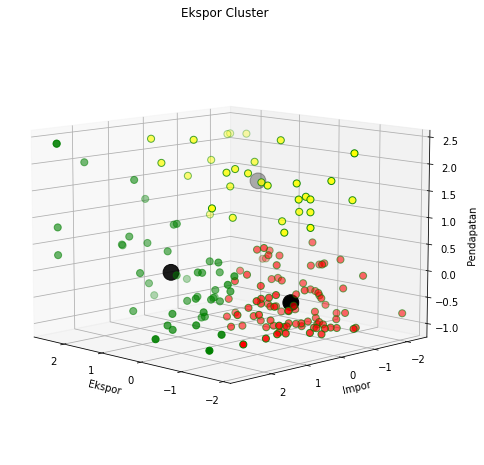

In [37]:
# Create canvas
fig = plt.figure(figsize=(12, 8))

# Create 3D plotting
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfclust3_ekspor['Ekspor'][dfclust3_ekspor.labels_ekspor_3==0], dfclust3_ekspor['Impor'][dfclust3_ekspor.labels_ekspor_3==0], dfclust3_ekspor['Pendapatan'][dfclust3_ekspor.labels_ekspor_3==0], c='green', s=50, edgecolors='green')
ax.scatter(dfclust3_ekspor['Ekspor'][dfclust3_ekspor.labels_ekspor_3==1], dfclust3_ekspor['Impor'][dfclust3_ekspor.labels_ekspor_3==1], dfclust3_ekspor['Pendapatan'][dfclust3_ekspor.labels_ekspor_3==1], c='red', s=50, edgecolors='green')
ax.scatter(dfclust3_ekspor['Ekspor'][dfclust3_ekspor.labels_ekspor_3==2], dfclust3_ekspor['Impor'][dfclust3_ekspor.labels_ekspor_3==2], dfclust3_ekspor['Pendapatan'][dfclust3_ekspor.labels_ekspor_3==2], c='yellow', s=50, edgecolors='green')

scatter = ax.scatter(kmeans_ekspor_3.cluster_centers_[:, 0], kmeans_ekspor_3.cluster_centers_[:, 1], kmeans_ekspor_3.cluster_centers_[:, 2], s = 250, marker='o', c='k', label='centroids')
plt.title('Ekspor Cluster')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
ax.set_zlabel('Pendapatan')

# rotate the axes and update
ax.view_init(10, 135)

plt.show()

Analysis: 
Cluster 1 (green), memiliki angka **impor** yang **lebih tinggi**
Cluster 2 (red), memiliki angka **pendapatan** yang **rendah** dan **impor** yang **rendah**
Cluster 3 (yellow), memiliki angka **impor, ekspor** dan **pendapatan** yang **tinggi**

Untuk **cluster 1 dan 3** masih terdapat beberapa data yang **general** dan **tidak dapat** diambil **kesimpulan** terutama untuk **kolom ekspor**.

<h2>4-Means Clustering</h2>

In [38]:
# Learning the data with KMeans cluster k = 4
kmeans_ekspor_4 = KMeans(n_clusters=4, random_state=42).fit(dfselect_2)

# Get the labels from kmeans
labels_ekspor_4 = kmeans_ekspor_4.labels_

# Create new dataframe with dataframe that have been scaled and rename the column
dfclust4_ekspor = pd.DataFrame(data=dfselect_2, columns=['Ekspor', 'Impor', 'Pendapatan'])

# Add new column 'label_2' as the label of the cluster
dfclust4_ekspor['labels_ekspor_4'] = kmeans_ekspor_4.labels_
dfclust4_ekspor

,Ekspor,Impor,Pendapatan,labels_ekspor_4
0,-1.391107,-0.047444,-0.943936,3
1,-0.543547,0.135021,-0.395181,3
2,-0.053846,-0.713196,-0.199291,3
3,1.071524,-0.146074,-0.660984,0
4,0.280469,0.642965,0.209637,0
...,...,...,...,...
162,0.332264,0.337212,-0.855555,0
163,-0.520004,-1.393742,0.038151,3
164,1.528265,1.693373,-0.753982,0
165,-0.449374,-0.565251,-0.754642,3


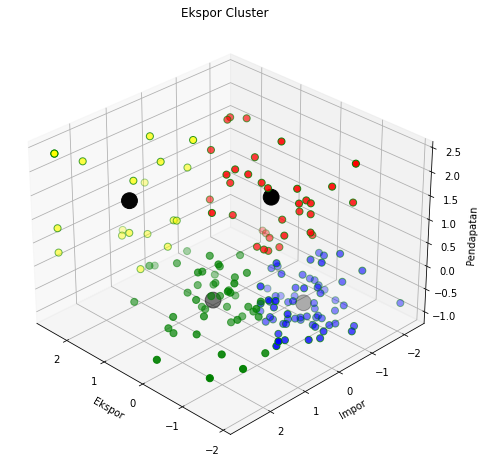

In [39]:
# Create canvas
fig = plt.figure(figsize=(12, 8))

# Create 3D plotting
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfclust4_ekspor['Ekspor'][dfclust4_ekspor.labels_ekspor_4==0], dfclust4_ekspor['Impor'][dfclust4_ekspor.labels_ekspor_4==0], dfclust4_ekspor['Pendapatan'][dfclust4_ekspor.labels_ekspor_4==0], c='green', s=50, edgecolors='green')
ax.scatter(dfclust4_ekspor['Ekspor'][dfclust4_ekspor.labels_ekspor_4==1], dfclust4_ekspor['Impor'][dfclust4_ekspor.labels_ekspor_4==1], dfclust4_ekspor['Pendapatan'][dfclust4_ekspor.labels_ekspor_4==1], c='red', s=50, edgecolors='green')
ax.scatter(dfclust4_ekspor['Ekspor'][dfclust4_ekspor.labels_ekspor_4==2], dfclust4_ekspor['Impor'][dfclust4_ekspor.labels_ekspor_4==2], dfclust4_ekspor['Pendapatan'][dfclust4_ekspor.labels_ekspor_4==2], c='yellow', s=50, edgecolors='green')
ax.scatter(dfclust4_ekspor['Ekspor'][dfclust4_ekspor.labels_ekspor_4==3], dfclust4_ekspor['Impor'][dfclust4_ekspor.labels_ekspor_4==3], dfclust4_ekspor['Pendapatan'][dfclust4_ekspor.labels_ekspor_4==3], c='blue', s=50, edgecolors='green')

scatter = ax.scatter(kmeans_ekspor_4.cluster_centers_[:, 0], kmeans_ekspor_4.cluster_centers_[:, 1], kmeans_ekspor_4.cluster_centers_[:, 2], s = 250, marker='o', c='k', label='centroids')
plt.title('Ekspor Cluster')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
ax.set_zlabel('Pendapatan')

# rotate the axes and update
ax.view_init(30, 135)

plt.show()

Analysis:
- Cluster 1 (green), memiliki angka **impor** yang **tinggi**, **ekspor** rentang **2 sampai -1**, dan **pendapatan** yang **rendah**
- Cluster 2 (red), memiliki angka **impor** yang **rendah**, **ekspor** yang **tinggi**, dan **pendapatan** yang **tinggi**
- Cluster 3 (yellow), memiliki angka **import** yang **tinggi**, **ekspor** yang **tinggi**, dan **pendapatan** yang **tinggi**
- Cluster 4 (blue), memiliki angka **impor** yang **rendah**, **ekspor** yang **rendah**, dan **pendapatan** yang **rendah**

<h1>Cluster for Column GDPperkapita</h1>

<h2>Handling Outliers</h2>

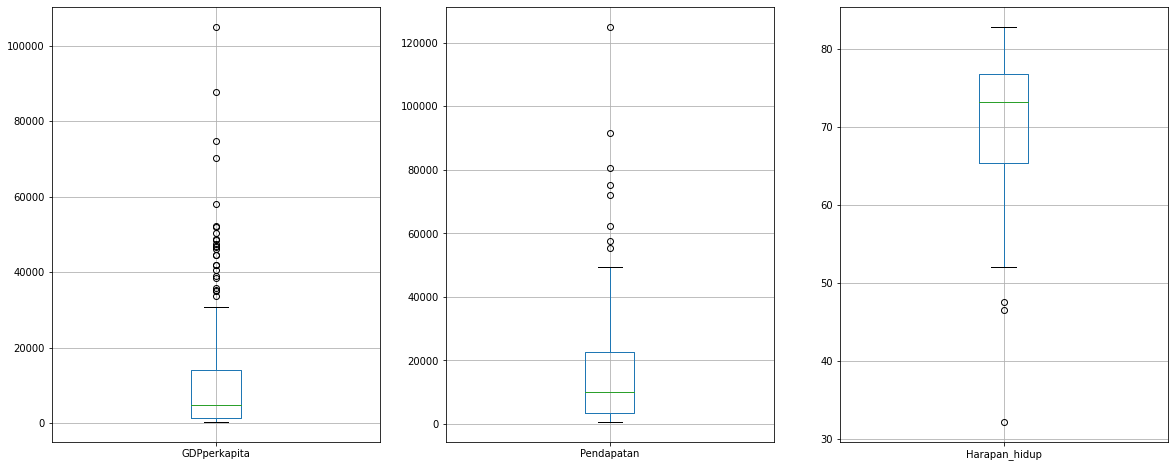

In [40]:
# Data visualization before handling outliers

# Create canvas with 1-D array axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

# Visualize the data
# initializing the axes index
i = 0
for col in dfgdp.columns:
    if(col != 'Negara'):
        dfgdp.boxplot(column=col, ax=axes[i])
        i += 1

In [41]:
# Replace outliers with upper and lower value from dataframe

for col in dfgdp.columns:
    if(col != 'Negara'):
        dfgdp[col] = replace_outliers(dfgdp[col])

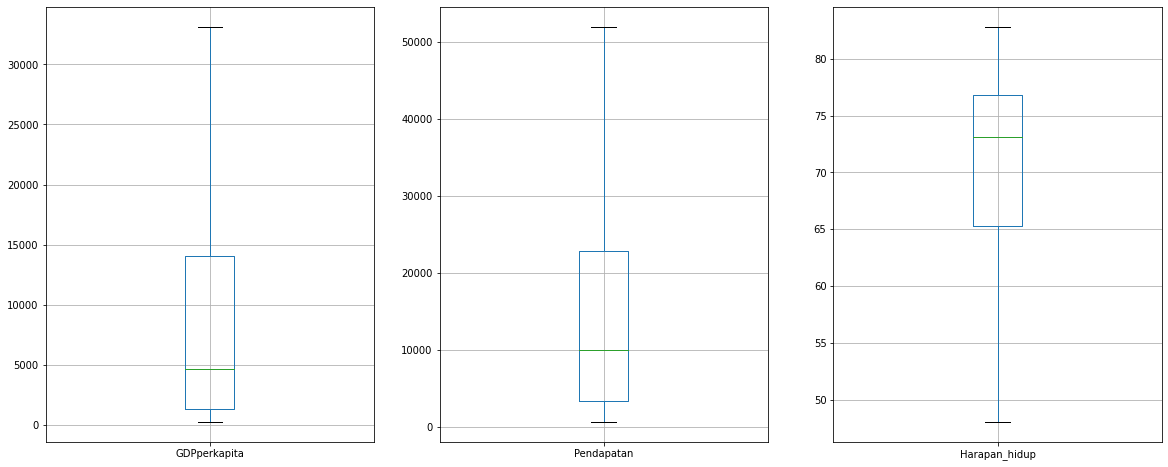

In [42]:
# Data visualization after handling outliers

# Create canvas with 1-D array axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

# Visualize the data
# initializing the axes index
i = 0
for col in dfgdp.columns:
    if(col != 'Negara'):
        dfgdp.boxplot(column=col, ax=axes[i])
        i += 1

In [43]:
dfselect_3 = dfgdp[['GDPperkapita', 'Pendapatan', 'Harapan_hidup']].copy()

<h2>Scaling Data</h2>

In [44]:
# Fit data scaling on dataframe
dfselect_3 = StandardScaler().fit_transform(dfselect_3.astype(float))

<h2>Elbow Method</h2>

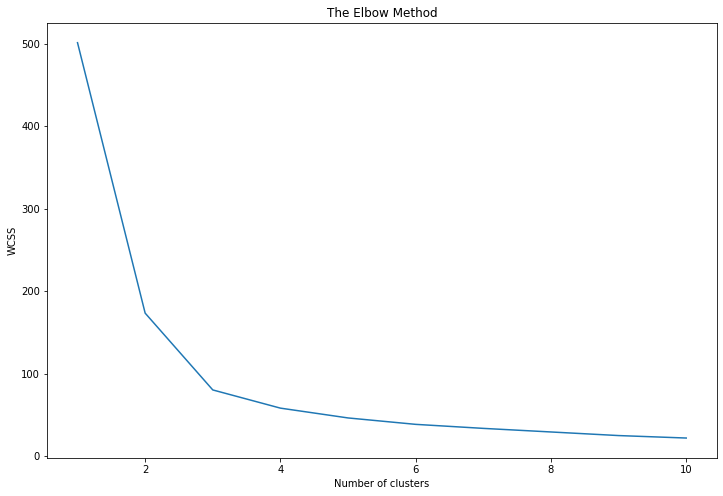

In [45]:
# Create array for WCSS value
wcss = [] 

# Create i KMeans from scaled dataframe
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dfselect_3)

    # kmeans.inertia sum of squared distances to the closest 'centroid' 
    # for all 'observation data' in the training set
    wcss.append(kmeans.inertia_)

# Create canvas
plt.figure(figsize=(12, 8))

# Plotting the array of wcss
plt.plot(range(1, 11), wcss)

# Give the title, x label, and y label in the canvas
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

Analysis: There are Elbow points on 2 and 3 x value.

<h2>2-Means Clustering</h2>

In [46]:
# Learning the data with KMeans cluster k = 2
kmeans_gdp_2 = KMeans(n_clusters=2, random_state=42).fit(dfselect_3)

# Get the labels from kmeans
labels_gdp_2 = kmeans_gdp_2.labels_

# Create new dataframe with dataframe that have been scaled and rename the column
dfclust_gdp_2 = pd.DataFrame(data=dfselect_3, columns=['GDPperkapita', 'Pendapatan', 'Harapan_hidup'])

# Add new column 'labels_gdp_2' as the label of the cluster
dfclust_gdp_2['labels_gdp_2'] = kmeans_gdp_2.labels_
dfclust_gdp_2

,GDPperkapita,Pendapatan,Harapan_hidup,labels_gdp_2
0,-0.846341,-0.943936,-1.702225,0
1,-0.540827,-0.395181,0.663321,0
2,-0.508868,-0.199291,0.686859,0
3,-0.589198,-0.660984,-1.243238,0
4,0.159686,0.209637,0.722166,0
...,...,...,...,...
162,-0.637569,-0.855555,-0.901941,0
163,0.271975,0.038151,0.557401,0
164,-0.780954,-0.753982,0.286717,0
165,-0.780954,-0.754642,-0.372341,0


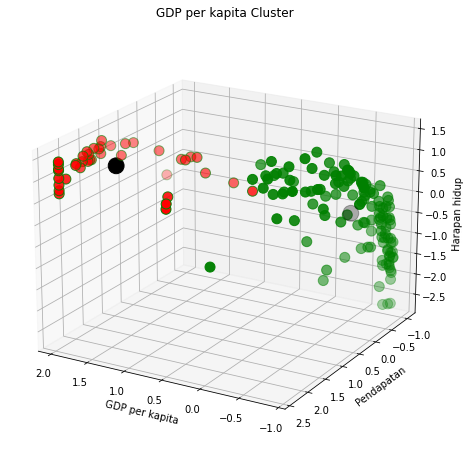

In [47]:
# Create canvas
fig = plt.figure(figsize=(12, 8))

# Create 3D plotting
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfclust_gdp_2['GDPperkapita'][dfclust_gdp_2.labels_gdp_2==0], dfclust_gdp_2['Pendapatan'][dfclust_gdp_2.labels_gdp_2==0], dfclust_gdp_2['Harapan_hidup'][dfclust_gdp_2.labels_gdp_2==0], c='green', s=100, edgecolors='green')
ax.scatter(dfclust_gdp_2['GDPperkapita'][dfclust_gdp_2.labels_gdp_2==1], dfclust_gdp_2['Pendapatan'][dfclust_gdp_2.labels_gdp_2==1], dfclust_gdp_2['Harapan_hidup'][dfclust_gdp_2.labels_gdp_2==1], c='red', s=100, edgecolors='green')

scatter = ax.scatter(kmeans_gdp_2.cluster_centers_[:, 0], kmeans_gdp_2.cluster_centers_[:, 1], kmeans_gdp_2.cluster_centers_[:, 2], s = 250, marker='o', c='k', label='centroids')
plt.title('GDP per kapita Cluster')
plt.xlabel('GDP per kapita')
plt.ylabel('Pendapatan')
ax.set_zlabel('Harapan hidup')

# rotate the axes and update
ax.view_init(20, 120)

plt.show()

Analysis: 
- Cluster 1 (green), memiliki value **harapan hidup** yang **bervariasi**, **pendapatan** yang **rendah**, dan **GDP per kapita** yang **rendah**
- Cluster 2 (red), memiliki value **harapan hidup** yang **tinggi**, **pendapatan** yang **tinggi**, dan **GDP per kapita** yang **tinggi**

Karena value harapan hidup pada **cluster 1** masih **bervariasi**, ditambahkan satu cluster lagi supaya dapat **mendapatkan** perbedaan dari **harapan hidup**

<h2>3-Means Clustering</h2>

In [48]:
# Learning the data with KMeans cluster k = 3
kmeans_gdp_3 = KMeans(n_clusters=3, random_state=42).fit(dfselect_3)

# Get the labels from kmeans
labels_gdp_3 = kmeans_gdp_3.labels_

# Create new dataframe with dataframe that have been scaled and rename the column
dfclust_gdp_3 = pd.DataFrame(data=dfselect_3, columns=['GDPperkapita', 'Pendapatan', 'Harapan_hidup'])

# Add new column 'labels_gdp_3' as the label of the cluster
dfclust_gdp_3['labels_gdp_3'] = kmeans_gdp_3.labels_
dfclust_gdp_3

,GDPperkapita,Pendapatan,Harapan_hidup,labels_gdp_3
0,-0.846341,-0.943936,-1.702225,2
1,-0.540827,-0.395181,0.663321,0
2,-0.508868,-0.199291,0.686859,0
3,-0.589198,-0.660984,-1.243238,2
4,0.159686,0.209637,0.722166,0
...,...,...,...,...
162,-0.637569,-0.855555,-0.901941,2
163,0.271975,0.038151,0.557401,0
164,-0.780954,-0.753982,0.286717,0
165,-0.780954,-0.754642,-0.372341,2


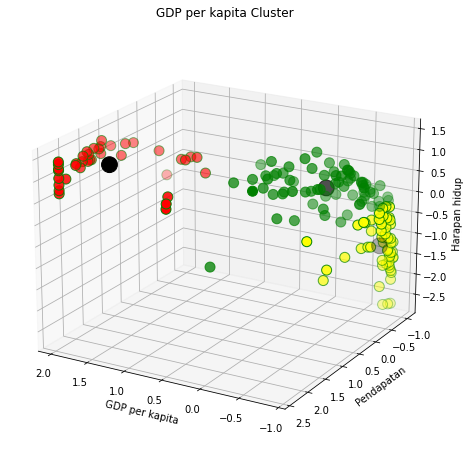

In [49]:
# Create canvas
fig = plt.figure(figsize=(12, 8))

# Create 3D plotting
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfclust_gdp_3['GDPperkapita'][dfclust_gdp_3.labels_gdp_3==0], dfclust_gdp_3['Pendapatan'][dfclust_gdp_3.labels_gdp_3==0], dfclust_gdp_3['Harapan_hidup'][dfclust_gdp_3.labels_gdp_3==0], c='green', s=100, edgecolors='green')
ax.scatter(dfclust_gdp_3['GDPperkapita'][dfclust_gdp_3.labels_gdp_3==1], dfclust_gdp_3['Pendapatan'][dfclust_gdp_3.labels_gdp_3==1], dfclust_gdp_3['Harapan_hidup'][dfclust_gdp_3.labels_gdp_3==1], c='red', s=100, edgecolors='green')
ax.scatter(dfclust_gdp_3['GDPperkapita'][dfclust_gdp_3.labels_gdp_3==2], dfclust_gdp_3['Pendapatan'][dfclust_gdp_3.labels_gdp_3==2], dfclust_gdp_3['Harapan_hidup'][dfclust_gdp_3.labels_gdp_3==2], c='yellow', s=100, edgecolors='green')

scatter = ax.scatter(kmeans_gdp_3.cluster_centers_[:, 0], kmeans_gdp_3.cluster_centers_[:, 1], kmeans_gdp_3.cluster_centers_[:, 2], s = 250, marker='o', c='k', label='centroids')
plt.title('GDP per kapita Cluster')
plt.xlabel('GDP per kapita')
plt.ylabel('Pendapatan')
ax.set_zlabel('Harapan hidup')

# rotate the axes and update
ax.view_init(20, 120)

plt.show()

Analysis:
- Cluster 1 (green), memiliki value **harapan hidup** yang **tinggi**, **pendapatan** yang **rendah**, dan **GDP per kapita** pada rentang **1 sampai -1**
- Cluster 2 (red), memiliki value **harapan hidup** yang **tinggi**, **pendapatan** yang **tinggi**, dan **GDP per kapita** yang **tinggi**
- Cluster 3 (yellow), memiliki value **harapan hidup** yang **rendah**, **pendapatan** yang **rendah**, dan **GDP per kapita** yang **rendah**

<h1>Summary Data</h1>

In [50]:
# Check size of labeled array each data
print('Length of labeled array')
print('Kid:', len(labels_kid), 'Ekspor:', len(labels_ekspor_4), 'GDP:', len(labels_gdp_3))

Length of labeled array
Kid: 167 Ekspor: 167 GDP: 167


In [51]:
# Add label into intiai dataframe focused data column
dfdeath['labels_kid'] = labels_kid
dfekspor['labels_ekspor'] = labels_ekspor_4
dfgdp['labels_gdp'] = labels_gdp_3

In [52]:
# Merge each focused data column 'label' with key on 'Negara'
df = pd.merge(df, dfdeath[['Negara', 'labels_kid']], how='left', on='Negara')
df = pd.merge(df, dfekspor[['Negara', 'labels_ekspor']], how='left', on='Negara')
df = pd.merge(df, dfgdp[['Negara', 'labels_gdp']], how='left', on='Negara')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,labels_kid,labels_ekspor,labels_gdp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,3,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,3,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,3,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0,0


In [53]:
# Get dataframe with conditional clustering label 
dfsummary = df[(df.labels_kid == 2) & (df.labels_ekspor == 3) & (df.labels_gdp == 2)]
dfsummary[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,labels_kid,labels_ekspor,labels_gdp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,3,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,3,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,3,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,3,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,3,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,3,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,3,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,3,2
56,Gambia,80.3,23.80,5.69,42.7,1660,4.300,65.5,5.71,562,2,3,2
63,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,2,3,2
